In [1]:
import numpy as np
from numpy import zeros, linspace
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from scipy.stats import binom

In [2]:
p = 0.02 #given
n = 20 #given

def perform_bernoulli_trials(n, p):
    """
    Perform n Bernoulli trials with success probability p
    and return number of successes.
    """
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success += 1

    return n_success

In [3]:
perform_bernoulli_trials(20,0.02)

0

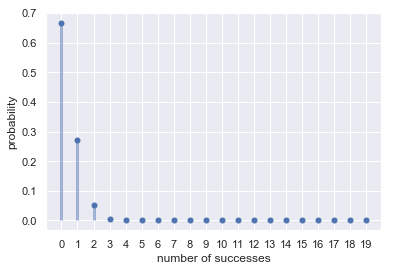

In [4]:
n, p = 20, 0.02
x = [x for x in range(20)]

fig, ax = plt.subplots(1, 1)
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=5, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=3, alpha=0.5)
plt.xticks(x)
plt.ylabel('probability')
plt.xlabel('number of successes')
plt.show()

In [13]:
n = 0
for i in range(0,2):
    n_success1 = perform_bernoulli_trials(n, p)
    n += n_success1

n

0

In [14]:
perform_bernoulli_trials(20, 0.02)

1

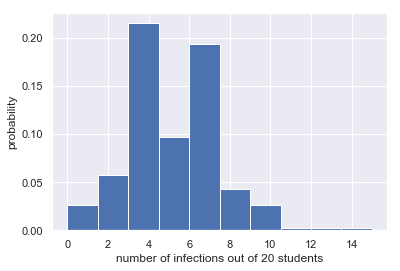

In [15]:
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)


# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults, density=True)
_ = plt.xlabel('number of infections out of 20 students')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

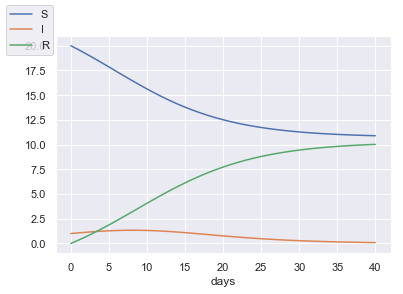

In [17]:
##DRAFT one that I found online?
## not exactly what we want
# Time unit: 1 day
beta = .02 #infection
gamma = 1/3 #recovery

N_t = 40              # Simulate for D days
dt=1

t = linspace(0, N_t, N_t+1)
S = zeros(N_t+1)
I = zeros(N_t+1)
R = zeros(N_t+1)

# Initial condition
S[0] = 20
I[0] = 1
R[0] = 0

# Step equations forward in time
for n in range(N_t):
    S[n+1] = S[n] - dt*beta*S[n]*I[n]
    I[n+1] = I[n] + dt*beta*S[n]*I[n] - dt*gamma*I[n]
    R[n+1] = R[n] + dt*gamma*I[n]

fig = plt.figure()
l1, l2, l3 = plt.plot(t, S, t, I, t, R)
fig.legend((l1, l2, l3), ('S', 'I', 'R'), 'upper left')
plt.xlabel('days')
plt.show()

In [22]:
def simulate_flu():
    N_t=10
    p = 0.02
    S = zeros(N_t+1)
    I = zeros(N_t+1)
    R = zeros(N_t+1)

    # Initial condition
    S[0] = 20 #how many individuals at time t can get infected, initially 20
    I[0] = 1 #how many individuals at time t are currently infected, initally 1 (aka Tommy)
    R[0] = 0 #how many individuals at time t are removed (recovered and immune?)


    # Step equations forward in time
    for n in range(N_t):
        print('\nstep ', n)
        print('supceptible ', S[n])
        print('currently infectious ',I[n])
        print('recovered ',R[n])
        infected = 0
        for i in range(int(I[n])):
            infected+=perform_bernoulli_trials(int(S[n]-i),p)
        print('infected this round ', infected)

        R[n+1] = R[n] + I[n-2]                                    
        S[n+1] = S[n] - infected - R[n]
        I[n+1] = I[n] + infected 
        
    return S, I, R

In [23]:
S,I,R = simulate_flu()


step  0
supceptible  20.0
currently infectious  1.0
recovered  0.0
infected this round  0

step  1
supceptible  20.0
currently infectious  1.0
recovered  0.0
infected this round  0

step  2
supceptible  20.0
currently infectious  1.0
recovered  0.0
infected this round  1

step  3
supceptible  19.0
currently infectious  2.0
recovered  1.0
infected this round  0

step  4
supceptible  18.0
currently infectious  2.0
recovered  2.0
infected this round  0

step  5
supceptible  16.0
currently infectious  2.0
recovered  3.0
infected this round  0

step  6
supceptible  13.0
currently infectious  2.0
recovered  5.0
infected this round  2

step  7
supceptible  6.0
currently infectious  4.0
recovered  7.0
infected this round  0

step  8
supceptible  -1.0
currently infectious  4.0
recovered  9.0
infected this round  0

step  9
supceptible  -10.0
currently infectious  4.0
recovered  11.0
infected this round  0


In [25]:
S>1

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False], dtype=bool)

In [30]:
days = [0,1,2,3,4,5,6,7,8,9,10]

Text(0, 0.5, 'Susceptibles')

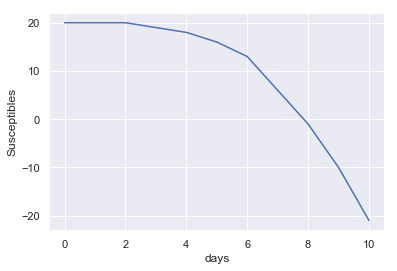

In [31]:
plt.plot(days, S)
plt.xlabel('days')
plt.ylabel('Susceptibles')

Text(0, 0.5, 'Infectives')

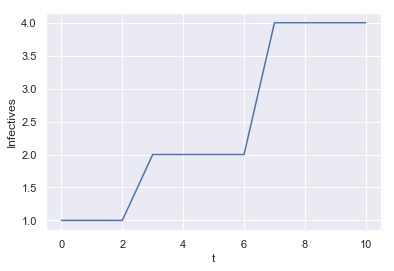

In [32]:
plt.plot(days, I)
plt.xlabel('t')
plt.ylabel('Infectives')